In [1]:
!pip install pandas numpy seaborn plotly matplotlib -qq

## Importação das bibliotecas iniciais
---

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

## Ajustes para o projeto
---

In [3]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

plt.rcParams['figure.figsize'] = (15, 6) # Tamanho do gráfico
plt.style.use('seaborn-darkgrid')        # Estilo do gráfico

## Leitura dos dados
---

In [4]:
dados_livros = pd.read_csv('./data/Books.csv')
dados_avaliacao = pd.read_csv('./data/Ratings.csv')
dados_usuario = pd.read_csv('./data/Users.csv')

In [5]:
dados_livros.shape, dados_avaliacao.shape, dados_usuario.shape

((271360, 8), (1149780, 3), (278858, 3))

## Modelagem dos dados
---

In [6]:
dados_livros.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [7]:
dados_livros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [8]:
dados_avaliacao.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [9]:
dados_avaliacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [10]:
dados_usuario.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [11]:
dados_usuario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [12]:
tab_merge = dados_livros.merge(dados_avaliacao, how='inner', on='ISBN')
tab_merge = tab_merge.merge(dados_usuario, how='inner', on='User-ID')
tab_merge.shape

(1031136, 12)

In [13]:
tab_merge.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",NaN
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,8,0,"timmins, ontario, canada",NaN
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,8,0,"timmins, ontario, canada",NaN
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,8,0,"timmins, ontario, canada",NaN


In [14]:
tab_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ISBN                 1031136 non-null  object 
 1   Book-Title           1031136 non-null  object 
 2   Book-Author          1031135 non-null  object 
 3   Year-Of-Publication  1031136 non-null  object 
 4   Publisher            1031134 non-null  object 
 5   Image-URL-S          1031136 non-null  object 
 6   Image-URL-M          1031136 non-null  object 
 7   Image-URL-L          1031132 non-null  object 
 8   User-ID              1031136 non-null  int64  
 9   Book-Rating          1031136 non-null  int64  
 10  Location             1031136 non-null  object 
 11  Age                  753301 non-null   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 102.3+ MB


In [15]:
# Ajustando os registros incorreto
tab_merge.iloc[287500, 3] = ''
tab_merge.iloc[467962, 3] = ''
tab_merge.iloc[469216, 3] = ''
tab_merge.iloc[352361, 3] = ''

# Convertendo coluna par numérico
tab_merge['Year-Of-Publication'] = pd.to_numeric(tab_merge['Year-Of-Publication'])

In [16]:
tab_merge.dtypes

ISBN                    object
Book-Title              object
Book-Author             object
Year-Of-Publication    float64
Publisher               object
Image-URL-S             object
Image-URL-M             object
Image-URL-L             object
User-ID                  int64
Book-Rating              int64
Location                object
Age                    float64
dtype: object

## Tratativas da coluna 'Location'
---

In [17]:
tab_merge['Location'].head()

0    stockton, california, usa
1     timmins, ontario, canada
2     timmins, ontario, canada
3     timmins, ontario, canada
4     timmins, ontario, canada
Name: Location, dtype: object

In [18]:
tab_merge['Location'].tail()

1031131                       venice, florida, usa
1031132                   tioga, pennsylvania, usa
1031133                      madrid, madrid, spain
1031134                  grand prairie, texas, usa
1031135    bielefeld, nordrhein-westfalen, germany
Name: Location, dtype: object

In [19]:
# Técnica de tratamento de texto
def extrair_pais(regiao):
    registro = regiao
    registro = registro.split(',')[-1].upper().strip()
    
    return registro

tab_merge['Pais'] = tab_merge['Location'].apply(extrair_pais)

tab_merge.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age,Pais
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0,USA
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",NaN,CANADA
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,8,0,"timmins, ontario, canada",NaN,CANADA
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,8,0,"timmins, ontario, canada",NaN,CANADA
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,8,0,"timmins, ontario, canada",NaN,CANADA


In [20]:
tab_merge.isnull().sum()

ISBN                        0
Book-Title                  0
Book-Author                 1
Year-Of-Publication         4
Publisher                   2
Image-URL-S                 0
Image-URL-M                 0
Image-URL-L                 4
User-ID                     0
Book-Rating                 0
Location                    0
Age                    277835
Pais                        0
dtype: int64

In [21]:
tab_merge.nunique()

ISBN                   270151
Book-Title             241071
Book-Author            101588
Year-Of-Publication       116
Publisher               16729
Image-URL-S            269842
Image-URL-M            269842
Image-URL-L            269839
User-ID                 92106
Book-Rating                11
Location                22480
Age                       141
Pais                      288
dtype: int64

### Renomeando as colunas 
---

In [22]:
tab_merge.rename(
columns={
    'Book-Title': 'Titulo',
    'Book-Author': 'Autor',
    'Year-Of-Publication': 'Ano_Publicacao',
    'Publisher': 'Editora',
    'User-ID': 'Id_Cliente',
    'Book-Rating': 'Avaliacao',
    'Location': 'Localizacao',
    'Age': 'Idade'
}, inplace=True)

In [23]:
tab_merge.columns

Index(['ISBN', 'Titulo', 'Autor', 'Ano_Publicacao', 'Editora', 'Image-URL-S',
       'Image-URL-M', 'Image-URL-L', 'Id_Cliente', 'Avaliacao', 'Localizacao',
       'Idade', 'Pais'],
      dtype='object')

# Data Visualization - exploração
---

In [25]:
tab_merge.describe()

,Ano_Publicacao,Id_Cliente,Avaliacao,Idade
count,1.031132e+06,1.031136e+06,1.031136e+06,753301.000000
mean,1.968195e+03,1.405945e+05,2.839051e+00,37.397648
std,2.311015e+02,8.052466e+04,3.854157e+00,14.098254
min,0.000000e+00,2.000000e+00,0.000000e+00,0.000000
25%,1.992000e+03,7.041500e+04,0.000000e+00,28.000000
50%,1.997000e+03,1.412100e+05,0.000000e+00,35.000000
75%,2.001000e+03,2.114260e+05,7.000000e+00,45.000000
max,2.050000e+03,2.788540e+05,1.000000e+01,244.000000


In [32]:
 tab_merge.head()
# remover as avaliações zeradas
tab_merge = tab_merge.loc[tab_merge.Avaliacao > 0]

tab_merge.isnull().sum(), tab_merge.shape

(ISBN                   0
 Titulo                 0
 Autor                  1
 Ano_Publicacao         1
 Editora                2
 Image-URL-S            0
 Image-URL-M            0
 Image-URL-L            1
 Id_Cliente             0
 Avaliacao              0
 Localizacao            0
 Idade             114221
 Pais                   0
 dtype: int64,
 (383842, 13))

In [33]:
tab_merge.Avaliacao.describe()

count    383842.000000
mean          7.626701
std           1.841339
min           1.000000
25%           7.000000
50%           8.000000
75%           9.000000
max          10.000000
Name: Avaliacao, dtype: float64

<AxesSubplot: title={'center': 'Analisando a avaliação'}, xlabel='Avaliacao'>

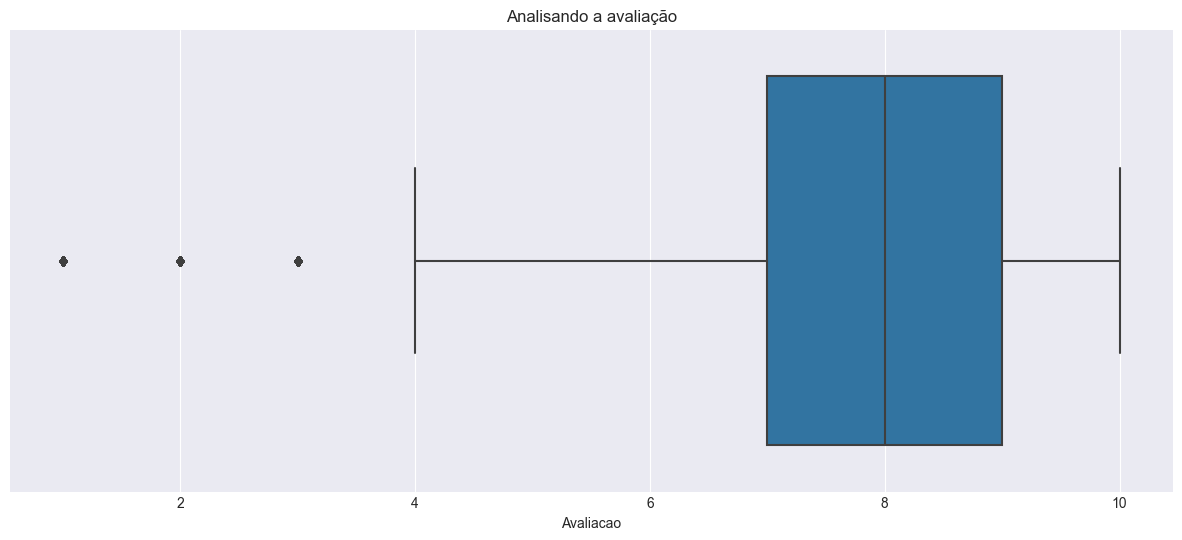

In [35]:
# Analise gráfica
plt.title('Analisando a avaliação')
sns.boxplot(data=tab_merge, x='Avaliacao')

In [37]:
# Analise
Analise = tab_merge.groupby(by=['Titulo']).agg(
    Quantidade = ('Titulo', 'count'),
    Media = ('Avaliacao', 'mean'),
    Max = ('Avaliacao', 'mean'),
    Min = ('Avaliacao', 'min'),
    Mediana = ('Avaliacao', 'median'))
Analise.head()

,Quantidade,Media,Max,Min,Mediana
Titulo,,,,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",1,9.000000,9.000000,9,9.0
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1,8.000000,8.000000,8,8.0
Dark Justice,1,10.000000,10.000000,10,10.0
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",7,7.142857,7.142857,1,7.0
Final Fantasy Anthology: Official Strategy Guide (Brady Games),2,10.000000,10.000000,10,10.0


In [38]:
# Verificar
Analise.sort_values('Quantidade', ascending=False).head()

,Quantidade,Media,Max,Min,Mediana
Titulo,,,,,
The Lovely Bones: A Novel,707,8.185290,8.185290,1,8.0
Wild Animus,581,4.390706,4.390706,1,4.0
The Da Vinci Code,494,8.439271,8.439271,1,9.0
The Secret Life of Bees,406,8.477833,8.477833,2,9.0
The Nanny Diaries: A Novel,393,7.437659,7.437659,1,8.0
